<a href="https://colab.research.google.com/github/mmc7676/House_2018results/blob/master/538_Elo_Carmelo_Classification_2_Predicting_Game_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('hopefully.csv')
df.info

<bound method DataFrame.info of             date team    carm_post  ...  conference  margin_prior  score_prior
0     2015-12-02  ATL  1545.970527  ...        East             6          106
1     2015-12-04  ATL  1548.018731  ...        East           -10           86
2     2015-12-09  ATL  1555.323546  ...        East            13          100
3     2015-12-10  ATL  1551.901211  ...        East             3           98
4     2015-12-12  ATL  1534.270647  ...        East           -13           94
...          ...  ...          ...  ...         ...           ...          ...
4965  2019-03-23  WAS  1447.587204  ...        East            -5          108
4966  2019-03-26  WAS  1436.775867  ...        East            -5          108
4967  2019-03-27  WAS  1442.301504  ...        East           -18          106
4968  2019-03-29  WAS  1440.910580  ...        East             3          124
4969  2019-03-31  WAS  1456.379556  ...        East            -4          124

[4970 rows x 17 col

In [2]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4969
Data columns (total 17 columns):
date            4970 non-null object
team            4970 non-null object
carm_post       4970 non-null float64
carm_pre        4970 non-null float64
carm_prob       4970 non-null float64
elo_post        4970 non-null float64
elo_pre         4970 non-null float64
elo_prob        4970 non-null float64
margin          4970 non-null int64
score           4970 non-null int64
won             4970 non-null object
make            4970 non-null object
won_prior       4970 non-null object
carm_prior      4970 non-null float64
conference      4970 non-null object
margin_prior    4970 non-null int64
score_prior     4970 non-null int64
dtypes: float64(7), int64(4), object(6)
memory usage: 698.9+ KB


In [3]:
df.columns

Index(['date', 'team', 'carm_post', 'carm_pre', 'carm_prob', 'elo_post',
       'elo_pre', 'elo_prob', 'margin', 'score', 'won', 'make', 'won_prior',
       'carm_prior', 'conference', 'margin_prior', 'score_prior'],
      dtype='object')

# This is the new data that will be used for the analysis.  It is all taken from the # NBA Forecasts collection on 538's githun repository and domain knowledge of NBA+Season outcomes
https://github.com/fivethirtyeight/data/tree/master/nba-forecasts\

https://projects.fivethirtyeight.com/nba-model/nba_elo.csv - we used this link in the first cell of the project to pull data in to pandas.

There are a few changes to what I had when I was trying to train the models

date - only includes months thefrom December to March each year.  This is the meat of the NBA Season
team - still home team's data we are using
carm_post-going to drop this column, it waas used to create carm prior
carm_pre - pregame carmelo rating-collection of players on team
elo_post- this variable will be dropped for this project, but that was the focus of our other research-team
elo_pre- teams rating pregame
elo_prob - probability of home time winning according to ELO...this should probably be quantiled
margin- for that game,winner is positive. being dropped
score - for that game,winner is positive. being dropped
won- this is the new target variable
make- is if the team made the playoffs during this season-ideally, should be last
won_prior- if team won last game  Yes/NO
        carm_prior - this represents the difference between the post_carmelo score (after) the last game and the pre_carmelo this game.  This accounts if a team trades a player over all star break or similar
        
conference-east or west
margin_prior how much the team lost or last game by
score prior-how man points this(hom) team scored last game

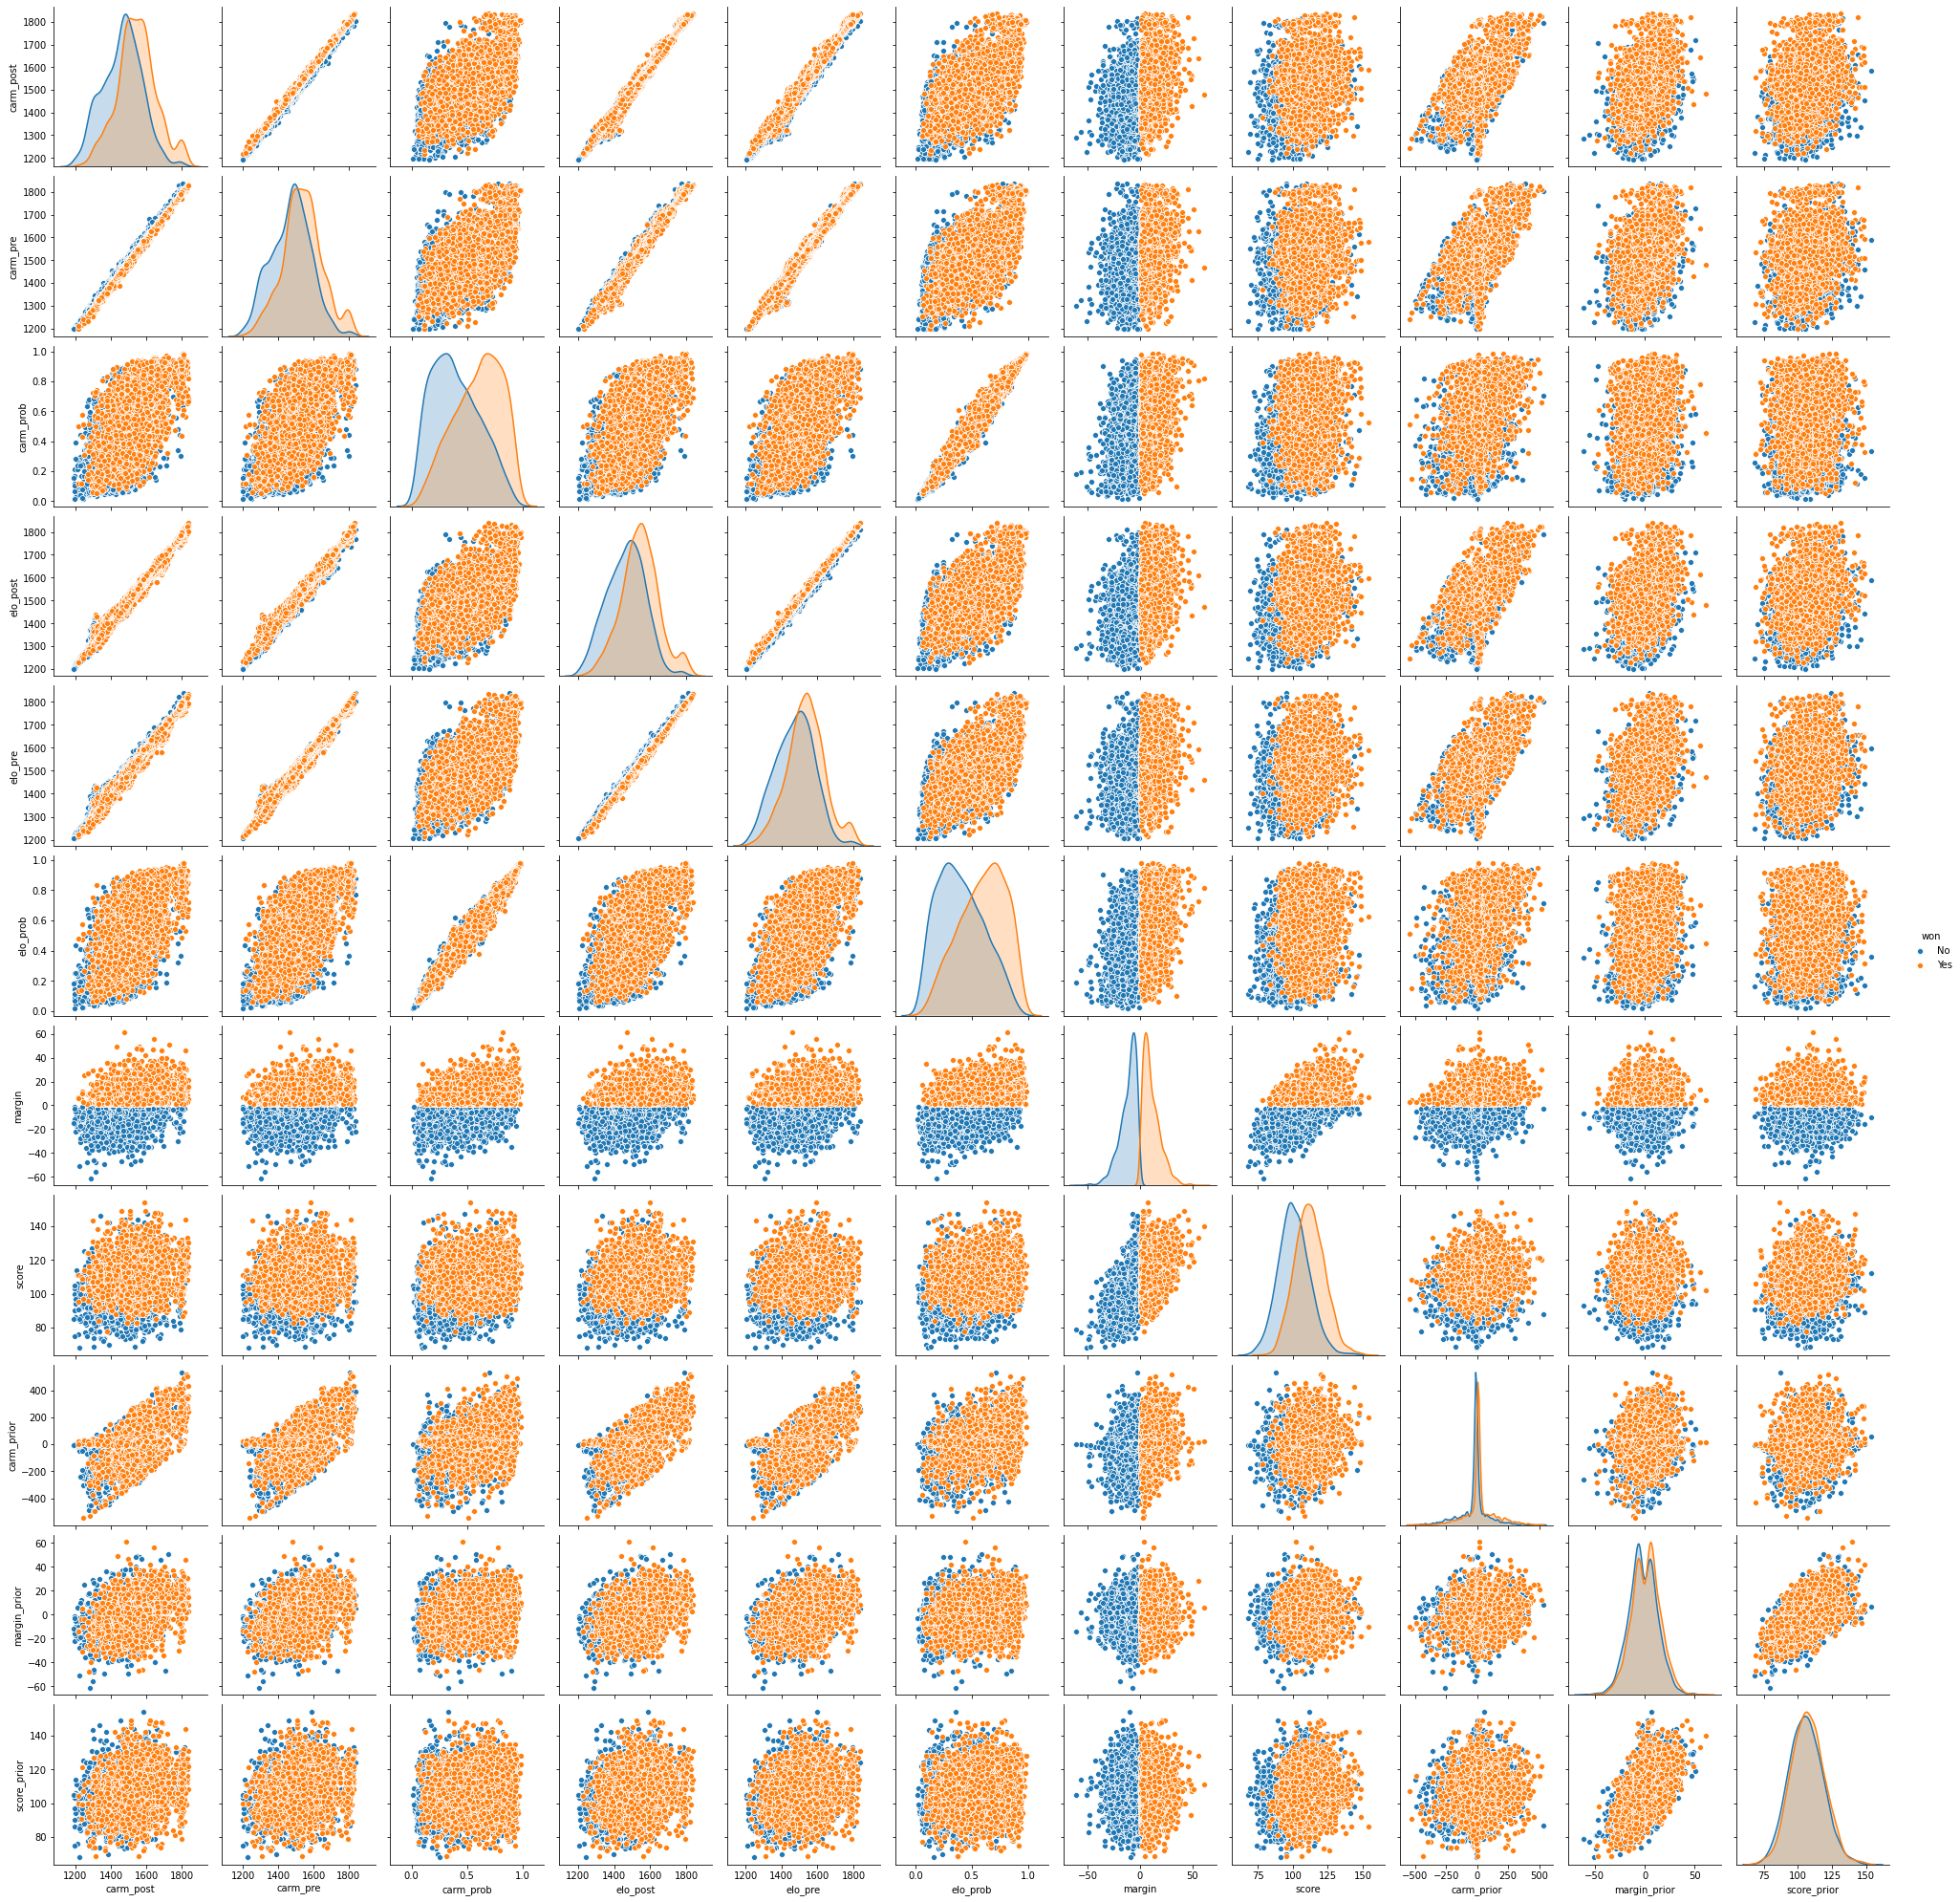

In [4]:
# do a new pairplot for this
import seaborn as sns

g = sns.pairplot(df, hue = 'won') 

In [5]:
df = df.drop(['carm_post', 'elo_post', 'margin', 'score'], axis =1)
df.describe().T
# this shows that from Dec-March in 2016-2019 seaons.  That 61 points war the highest margin(winniing points, 68 was lowest points score in game) 

,count,mean,std,min,25%,50%,75%,max
carm_pre,4970.0,1505.662408,117.789561,1196.256418,1432.320670,1507.107728,1581.552006,1836.233807
carm_prob,4970.0,0.500000,0.234828,0.013407,0.307957,0.500000,0.692043,0.986593
elo_pre,4970.0,1504.767249,111.713630,1204.907279,1429.373138,1508.102527,1577.068646,1838.617414
elo_prob,4970.0,0.500000,0.224865,0.018315,0.316625,0.500000,0.683375,0.981685
carm_prior,4970.0,-0.604542,117.977317,-543.934507,-24.226677,-0.484222,23.136176,533.955360
margin_prior,4970.0,0.000201,14.077146,-61.000000,-9.000000,0.000000,9.000000,61.000000
score_prior,4970.0,106.598994,12.362667,68.000000,98.000000,106.000000,115.000000,154.000000


In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969
date,2015-12-02,2015-12-04,2015-12-09,2015-12-10,2015-12-12,2015-12-14,2015-12-16,2015-12-18,2015-12-20,2015-12-21,2015-12-23,2015-12-26,2015-12-28,2015-12-29,2016-01-03,2016-01-05,2016-01-07,2016-01-09,2016-01-13,2016-01-15,2016-01-16,2016-01-18,2016-01-20,2016-01-21,2016-01-23,2016-01-25,2016-01-27,2016-01-28,2016-01-31,2016-03-04,2016-03-05,2016-03-08,2016-03-10,2016-03-12,2016-03-13,2016-03-16,2016-03-17,2016-03-19,2016-03-21,2016-03-23,...,2018-12-12,2018-12-14,2018-12-16,2018-12-18,2018-12-19,2018-12-22,2018-12-23,2018-12-26,2018-12-28,2018-12-29,2019-01-02,2019-01-04,2019-01-06,2019-01-08,2019-01-09,2019-01-11,2019-01-13,2019-01-17,2019-01-21,2019-01-24,2019-01-25,2019-01-27,2019-01-29,2019-01-30,2019-02-02,2019-02-04,2019-03-08,2019-03-09,2019-03-11,2019-03-13,2019-03-15,2019-03-16,2019-03-18,2019-03-20,2019-03-21,2019-03-23,2019-03-26,2019-03-27,2019-03-29,2019-03-31
team,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,...,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS
carm_pre,1560.12,1545.97,1548.02,1555.32,1551.9,1534.27,1512.91,1515.19,1530.23,1537.83,1542.64,1546.5,1551.25,1545.92,1557.43,1541.02,1525.82,1534.88,1545.03,1528.96,1519.87,1524.18,1531.57,1540.65,1536.11,1528.85,1541.71,1536.19,1526.78,1530.05,1540.11,1561.4,1572,1566.98,1572.52,1584.17,1590.84,1596.47,1601.25,1577.56,...,1466.69,1461.69,1455.61,1471.24,1459.39,1454.89,1457.2,1453.62,1446.8,1428.57,1433.93,1440.01,1436.38,1471.95,1466.64,1483.74,1495.04,1491.43,1493.23,1500.93,1494.76,1503.06,1495.54,1487.25,1504.74,1495.61,1486.1,1482.95,1479.61,1484.8,1493.49,1481.22,1487.19,1470.58,1462.11,1457.21,1447.59,1436.78,1442.3,1440.91
carm_prob,0.630924,0.891906,0.388048,0.170378,0.467994,0.766433,0.910966,0.280254,0.370398,0.720305,0.73778,0.81822,0.370412,0.329302,0.601433,0.796365,0.749162,0.601434,0.455685,0.530948,0.869104,0.715398,0.434364,0.423318,0.609706,0.499822,0.553933,0.327646,0.410708,0.731325,0.185257,0.404015,0.307801,0.729305,0.695571,0.479015,0.782339,0.761477,0.747168,0.419434,...,0.379685,0.385023,0.489688,0.611643,0.178986,0.75996,0.156911,0.33852,0.775405,0.56133,0.750695,0.267736,0.134476,0.213908,0.436925,0.37587,0.394971,0.744444,0.671196,0.36554,0.38636,0.335669,0.669158,0.44375,0.352387,0.78006,0.409709,0.270175,0.637909,0.566034,0.699734,0.621266,0.492079,0.536351,0.373659,0.632125,0.379232,0.504559,0.137967,0.157305
elo_pre,1566.53,1551.43,1553.74,1561.57,1555.2,1539.75,1520.64,1523.17,1537.12,1543.7,1549,1554.08,1558.84,1553.79,1563.67,1547.25,1531.98,1541.55,1551.7,1534.46,1525.56,1531.39,1538.05,1547.41,1542.6,1535.09,1547.29,1542.23,1530.79,1533.11,1543.72,1562.85,1572.94,1567.69,1574.32,1586.54,1593.24,1598.36,1604.42,1580.58,...,1453.8,1448.26,1442.42,1459.19,1448.41,1443.07,1445.3,1441.36,1434.81,1416.71,1422.48,1429.3,1425.98,1461.29,1456.18,1473.23,1484.42,1480.48,1482.51,1489.97,1483.72,1491.05,1485.47,1477.77,1493.21,1483.85,1477.27,1474.24,1470.12,1475.34,1484.16,1472.22,1476.91,1461.7,1453.57,1447.95,1439.74,1428.47,1433.22,1431.69
elo_prob,0.660326,0.87934,0.357135,0.291781,0.420863,0.715792,0.90226,0.314847,0.433473,0.696173,0.668715,0.818113,0.353658,0.397879,0.60193,0.798295,0.736924,0.601611,0.481979,0.522272,0.828949,0.7398,0.421321,0.443517,0.62436,0.520473,0.518171,0.385372,0.407246,0.718854,0.23181,0.425154,0.31966,0.684436,0.68294,0.47713,0.799691,0.707481,0.750075,0.419037,...,0.413073,0.372131,0.461359,0.57047,0.207916,0.767325,0.170967,0.32701,0.7722,0.535076,0.724603,0.

In [7]:
df.head()

,date,team,carm_pre,carm_prob,elo_pre,elo_prob,won,make,won_prior,carm_prior,conference,margin_prior,score_prior
0,2015-12-02,ATL,1560.119706,0.630924,1566.525789,0.660326,No,y,Yes,-5.935819,East,6,106
1,2015-12-04,ATL,1545.970527,0.891906,1551.425713,0.879340,Yes,y,No,-12.100975,East,-10,86
2,2015-12-09,ATL,1548.018731,0.388048,1553.742937,0.357135,Yes,y,Yes,9.353019,East,13,100
3,2015-12-10,ATL,1555.323546,0.170378,1561.570406,0.291781,No,y,Yes,3.882480,East,3,98
4,2015-12-12,ATL,1551.901211,0.467994,1555.204633,0.420863,No,y,No,-21.052899,East,-13,94


In [8]:
# now that those dummies are created, can drop team.  Also, date can be dropped.  In other models, we have used game in the season
data = pd.DataFrame(df['team'])
res = pd.get_dummies(data)
res.to_csv('output.csv')
print(res)


data2 = pd.DataFrame(df['make'])
res2 = pd.get_dummies(data2)
res2.to_csv('output2.csv')
print(res2)

data3 = pd.DataFrame(df['won_prior'])
res3 = pd.get_dummies(data3)
res3.to_csv('output3.csv')
print(res3)

df = pd.concat([df, res], axis=1)
df = pd.concat([df, res2], axis=1)
df = pd.concat([df, res3], axis=1)
df = df.drop(['make','conference', 'won_prior', 'team','date'], axis =1)

      team_ATL  team_BOS  team_BRK  ...  team_TOR  team_UTA  team_WAS
0            1         0         0  ...         0         0         0
1            1         0         0  ...         0         0         0
2            1         0         0  ...         0         0         0
3            1         0         0  ...         0         0         0
4            1         0         0  ...         0         0         0
...        ...       ...       ...  ...       ...       ...       ...
4965         0         0         0  ...         0         0         1
4966         0         0         0  ...         0         0         1
4967         0         0         0  ...         0         0         1
4968         0         0         0  ...         0         0         1
4969         0         0         0  ...         0         0         1

[4970 rows x 30 columns]
      make_n  make_y
0          0       1
1          0       1
2          0       1
3          0       1
4          0       1
...     

In [9]:
# this is a balanced data set inheriently
df.won.value_counts()

No     2485
Yes    2485
Name: won, dtype: int64

In [0]:
# one hot encode
df.loc[df['won'] == "Yes", 'won'] = 1 # assigns 1 to churned customers
df.loc[df['won'] == "No", 'won'] = 0 # assigns 0 to not-churned customers

# Now I am going to scale only the float64 variables

In [11]:
numerical_val = list(set(df.select_dtypes(include=['float64'])))
numerical_val

['elo_pre', 'carm_prior', 'elo_prob', 'carm_prob', 'carm_pre']

In [12]:
from sklearn.preprocessing import StandardScaler 

new_col = [i+'_standardized' for i in numerical_val] 
array = df[numerical_val].values 
data_scaler = StandardScaler().fit(array)
df[new_col] = pd.DataFrame(data_scaler.transform(array))
data_rescaled = pd.DataFrame(data_scaler.transform(array), columns = new_col)
df[numerical_val].head() 

,elo_pre,carm_prior,elo_prob,carm_prob,carm_pre
0,1566.525789,-5.935819,0.660326,0.630924,1560.119706
1,1551.425713,-12.100975,0.879340,0.891906,1545.970527
2,1553.742937,9.353019,0.357135,0.388048,1548.018731
3,1561.570406,3.882480,0.291781,0.170378,1555.323546
4,1555.204633,-21.052899,0.420863,0.467994,1551.901211


In [13]:
# ust need to drop the columns in numerical val ['elo_prob', 'carm_prior', 'elo_pre', 'carm_prob', 'carm_pre']

df = df.drop(['elo_prob', 'carm_prior', 'elo_pre', 'carm_prob', 'carm_pre'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4969
Data columns (total 42 columns):
won                        4970 non-null int64
margin_prior               4970 non-null int64
score_prior                4970 non-null int64
team_ATL                   4970 non-null uint8
team_BOS                   4970 non-null uint8
team_BRK                   4970 non-null uint8
team_CHI                   4970 non-null uint8
team_CHO                   4970 non-null uint8
team_CLE                   4970 non-null uint8
team_DAL                   4970 non-null uint8
team_DEN                   4970 non-null uint8
team_DET                   4970 non-null uint8
team_GSW                   4970 non-null uint8
team_HOU                   4970 non-null uint8
team_IND                   4970 non-null uint8
team_LAC                   4970 non-null uint8
team_LAL                   4970 non-null uint8
team_MEM                   4970 non-null uint8
team_MIA                   4970 non-null uint8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f365474ec18>]],
      dtype=object)

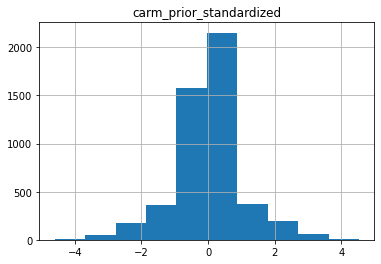

In [14]:
df.hist(column = 'carm_prior_standardized', bins=10) # this is a calculatiom

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36544d6e80>]],
      dtype=object)

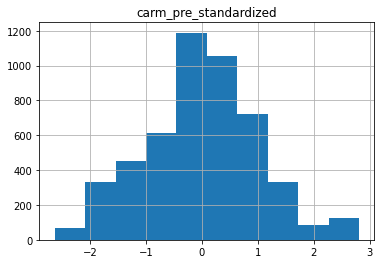

In [15]:
df.hist(column = 'carm_pre_standardized', bins=10) # this is a standardized of pre rating

In [0]:
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
input_var  = set(df.columns) - set(['won'])
X = df[input_var]
Y = df['won']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=28) #random state  28
# USED RANDOM STATE 42 BECAUSE IT WAS USED IN THE LECTURE

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [0]:
def get_performance(actual_Y, pred_Y):  # the actual output and predicted output
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm)) # total # of obs
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

# Logistic Regression

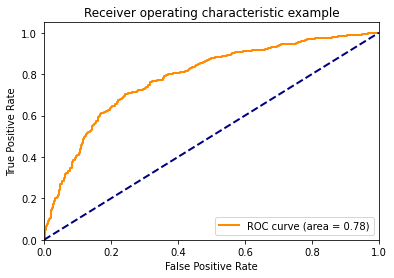

In [20]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') 
lr.fit(X_train, Y_train)
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)


from sklearn.metrics import roc_curve, auc
lr.predict_proba(X_test)
score_Y_lr = lr.predict_proba(X_test)  # gives probabilities
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [21]:
lr_model = lr.predict(X=X_train)
print(metrics.classification_report(Y_train, lr_model))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1765
           1       0.71      0.70      0.70      1714

    accuracy                           0.71      3479
   macro avg       0.71      0.71      0.71      3479
weighted avg       0.71      0.71      0.71      3479



In [22]:
lr_predicted = lr.predict(X=X_test)
print(metrics.classification_report(Y_test, lr_predicted))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       720
           1       0.76      0.70      0.73       771

    accuracy                           0.73      1491
   macro avg       0.73      0.73      0.73      1491
weighted avg       0.73      0.73      0.73      1491



# KNN

Text(0.5, 1.0, 'Team Won Game KNN Classification Accuracy vs Number of Neighbors')

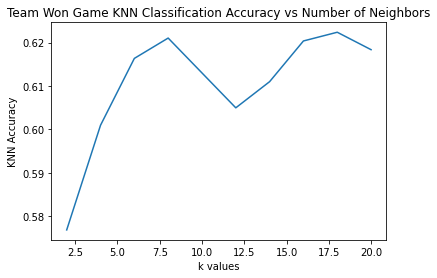

In [23]:
k = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
acc_knn = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_Y_knn = knn.predict(X_test)
    accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)
    acc_knn.append(accuracy_knn)
acc_knn

plt.plot(k, acc_knn)
plt.xlabel("k values")
plt.ylabel("KNN Accuracy")
plt.title('Team Won Game KNN Classification Accuracy vs Number of Neighbors')

In [24]:
knn_model = knn.predict(X=X_train)
print(metrics.classification_report(Y_train, knn_model))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1765
           1       0.71      0.64      0.67      1714

    accuracy                           0.69      3479
   macro avg       0.69      0.69      0.69      3479
weighted avg       0.69      0.69      0.69      3479



In [25]:
knn_predicted = knn.predict(X=X_test)
print(metrics.classification_report(Y_test, knn_predicted))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       720
           1       0.65      0.56      0.60       771

    accuracy                           0.62      1491
   macro avg       0.62      0.62      0.62      1491
weighted avg       0.62      0.62      0.62      1491



# Random Forest

Text(0.5, 1.0, 'Won Game Random Forest Classification Accuracy vs Number of Estimators')

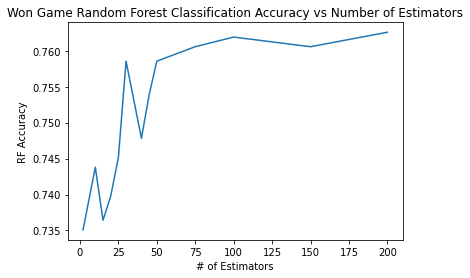

In [26]:
e = [2, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 150, 200]
acc_rf = []
for i in e:
    rf = RandomForestClassifier(n_estimators=i, max_depth=5, random_state=42)
    rf.fit(X_train, Y_train)
    pred_Y_rf = rf.predict(X_test)
    accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)
    acc_rf.append(accuracy_rf)
acc_rf

plt.plot(e, acc_rf)
plt.xlabel("# of Estimators")
plt.ylabel("RF Accuracy")
plt.title('Won Game Random Forest Classification Accuracy vs Number of Estimators')

In [27]:
rf_model = rf.predict(X=X_train)
print(metrics.classification_report(Y_train, rf_model))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1765
           1       0.78      0.76      0.77      1714

    accuracy                           0.77      3479
   macro avg       0.77      0.77      0.77      3479
weighted avg       0.77      0.77      0.77      3479



In [28]:
rf_predicted = rf.predict(X=X_test)
print(metrics.classification_report(Y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       720
           1       0.78      0.75      0.76       771

    accuracy                           0.76      1491
   macro avg       0.76      0.76      0.76      1491
weighted avg       0.76      0.76      0.76      1491




# Decision Tree

In [0]:
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15) # can use entropy or maxium depth
#maximum depth is how deep do want the trees to be.  can cause overfitting-works on training from generalization but fails test
#max depth is height of tree # of branches  not so high npt so low
dt.fit(X_train, Y_train)
pred_Y_dt = dt.predict(X_test)
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)


In [30]:
dt_model = dt.predict(X=X_train)
print(metrics.classification_report(Y_train, dt_model))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1765
           1       0.99      0.99      0.99      1714

    accuracy                           0.99      3479
   macro avg       0.99      0.99      0.99      3479
weighted avg       0.99      0.99      0.99      3479



In [31]:
dt_predicted = dt.predict(X=X_test)
print(metrics.classification_report(Y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       720
           1       0.80      0.76      0.78       771

    accuracy                           0.78      1491
   macro avg       0.78      0.78      0.78      1491
weighted avg       0.78      0.78      0.78      1491



In [0]:
models = ['kNN', 'NB', 'SVM', 'DT']

In [0]:
models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN'] # models that will be built

In [0]:
train_accuracy = [metrics.accuracy_score(Y_train, knn_model), metrics.accuracy_score(Y_train, rf_model), metrics.accuracy_score(Y_train, lr_model), metrics.accuracy_score(Y_train, dt_model)]

In [0]:
test_accuracy = [metrics.accuracy_score(Y_test, knn_predicted), metrics.accuracy_score(Y_test, rf_predicted), metrics.accuracy_score(Y_test, lr_predicted), metrics.accuracy_score(Y_test, dt_predicted)]

In [36]:
pd.DataFrame(list(zip(models, train_accuracy, test_accuracy)), columns =['Model', 'Train Accuracy', 'Test Accuracy'])

,Model,Train Accuracy,Test Accuracy
0,LogisticReg,0.692728,0.618377
1,DecisionTree,0.773498,0.762575
2,RandomForest,0.711124,0.728370
3,KNN,0.992239,0.775319


In [37]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.728370,0.756944,0.701686
Decision Trees,0.775319,0.793056,0.758755
Random Forest,0.762575,0.779167,0.747082
K-NN,0.618377,0.676389,0.564202


In [38]:
# accuracy compage
perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])
perf

,accuracy
Logistic Regression,0.728370
Decision Trees,0.775319
Random Forest,0.762575
K-NN,0.618377
